<h1>DUNEX Data Exploration Notebook </h1>
Written By: EJ Rainville, Fall 2021

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
from scipy import signal
from scipy import fft
from scipy import interpolate
import cftime
import sys
import datetime

# Import DUNEX Tools
sys.path.append('..')
from tools import microSWIFTTools
%matplotlib widget

<h2>Building Mission Diagnostic Tools</h2>

['microSWIFT_2', 'microSWIFT_3', 'microSWIFT_4', 'microSWIFT_6', 'microSWIFT_7', 'microSWIFT_8', 'microSWIFT_9', 'microSWIFT_56', 'microSWIFT_11', 'microSWIFT_12', 'microSWIFT_13', 'microSWIFT_14', 'microSWIFT_57', 'microSWIFT_16', 'microSWIFT_17', 'microSWIFT_18', 'microSWIFT_20', 'microSWIFT_21', 'microSWIFT_22', 'microSWIFT_23', 'microSWIFT_24', 'microSWIFT_58', 'microSWIFT_26', 'microSWIFT_27', 'microSWIFT_28', 'microSWIFT_29', 'microSWIFT_59', 'microSWIFT_31', 'microSWIFT_32', 'microSWIFT_33', 'microSWIFT_34', 'microSWIFT_35', 'microSWIFT_36', 'microSWIFT_37', 'microSWIFT_41', 'microSWIFT_42', 'microSWIFT_43', 'microSWIFT_44', 'microSWIFT_45', 'microSWIFT_46', 'microSWIFT_48', 'microSWIFT_49', 'microSWIFT_39', 'microSWIFT_50']
14401
14401
[-0.62692  -0.143569 -0.282353 ... 10.849058 10.755738 10.176675]


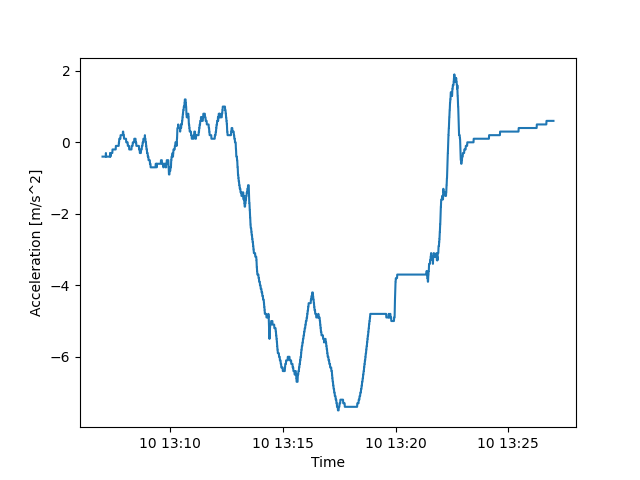

In [6]:
# Mission 20 netCDF path
mission_nc_path = '../microSWIFT_data/cleanedDataset/mission_20.nc'

# Load in netCDF file as a dataset
mission_dataset = nc.Dataset(mission_nc_path, mode='r')

# Get list of all microSWIFTs on the mission
microSWIFTs_on_mission = list(mission_dataset.groups.keys())
print(microSWIFTs_on_mission)

# Get Datetime values 
time = cftime.num2pydate(mission_dataset['time'],units=mission_dataset['time'].units, calendar=mission_dataset['time'].calendar)

# Get Acceleration values 
microSWIFT_num = 'microSWIFT_13'
accel_x = mission_dataset[microSWIFT_num]['accel_x'][:]
print(len(time))
print(len(accel_x))
print(accel_x[~np.isnan(accel_x)])

# Plot Accelerations for one microSWIFT
fig, ax = plt.subplots()
ax.plot(time, mission_dataset[microSWIFT_num]['gpsElevation'][:])
ax.set_ylabel('Acceleration [m/s^2]')
ax.set_xlabel('Time')

mission_dataset.close()



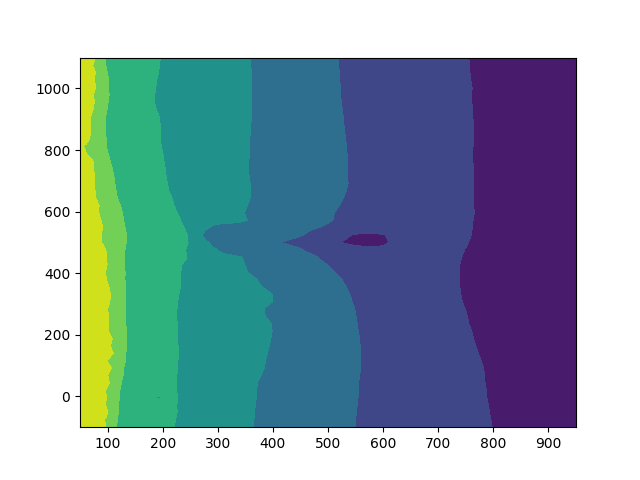

In [3]:
# Getting Bathymetry data from FRF data portal
# Data from September 28th, 2021
bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_dataset = nc.Dataset(bathy_url)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Plot the bathymetry
fig, ax = plt.subplots()
ax.contourf(xFRF_grid, yFRF_grid, bathy)
